# DBSCAN demo

Example script to test the DBSCAN clustering methods. DBSCAN demo from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

In [52]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [47]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

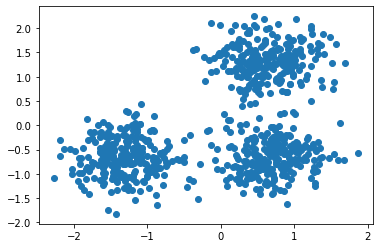

In [48]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [49]:
db = DBSCAN(eps=0.5, min_samples=50).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 3


In [50]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.954
Completeness: 0.936
V-measure: 0.945
Adjusted Rand Index: 0.970
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.623


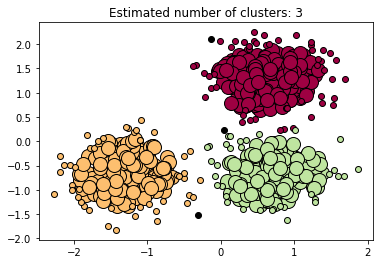

In [51]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# HDBSCAN Demo
Now demo hdbscan

In [253]:
from sklearn.datasets import make_blobs
import pandas as pd
import hdbscan

In [370]:
blobs, labels = make_blobs(n_samples=2000, n_features=2, centers=6)
pd.DataFrame(blobs).head()

,0,1
0,9.055234,4.427334
1,7.682954,5.110056
2,8.927079,4.271250
3,-4.734307,-10.411104
4,-8.833900,-3.588522


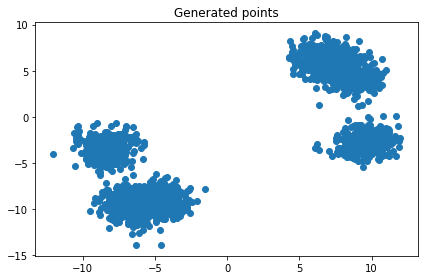

In [371]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(blobs[:, 0], blobs[:, 1])
ax.set_title('Generated points')
plt.tight_layout()
plt.show()

In [372]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=25, min_samples=None, p=None)
clusterer.fit(blobs)

C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,min_cluster_size,25
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


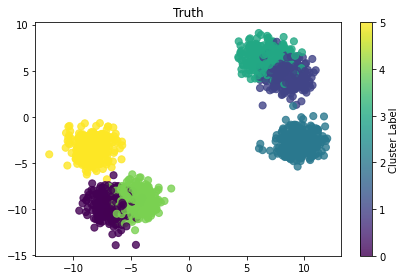

In [373]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(blobs[:, 0], blobs[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Truth')

plt.tight_layout()
plt.show()

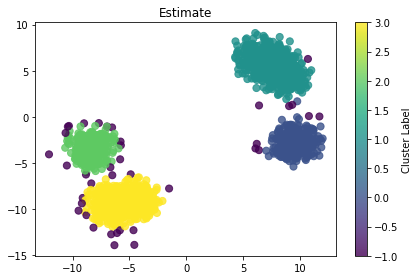

In [374]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(blobs[:, 0], blobs[:, 1], c=clusterer.labels_, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Estimate')

plt.tight_layout()
plt.show()

Now add noise.

In [375]:
# Number of noise points
n_noise = 100

# Random 2D points within the blob range
x_min, x_max = blobs[:, 0].min(), blobs[:, 0].max()
y_min, y_max = blobs[:, 1].min(), blobs[:, 1].max()

noise_points = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(n_noise, 2))
noise_labels = np.full(n_noise, -1)  # label -1 for noise

# Combine blobs and noise
all_points = np.vstack([blobs, noise_points])
all_labels = np.hstack([labels, noise_labels])

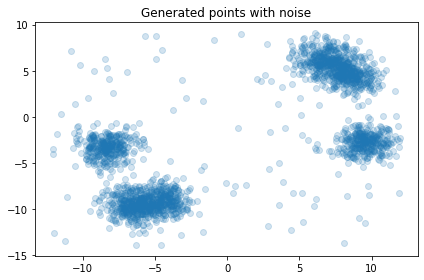

In [376]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(all_points[:, 0], all_points[:, 1], alpha=0.2)
ax.set_title('Generated points with noise')
plt.tight_layout()
plt.show()

In [377]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=100, min_samples=None, p=None)
clusterer.fit(all_points)

C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,min_cluster_size,100
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


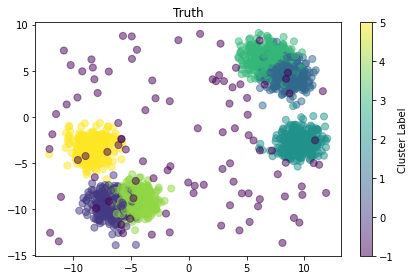

In [378]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(all_points[:, 0], all_points[:, 1], c=all_labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Truth')

plt.tight_layout()
plt.show()

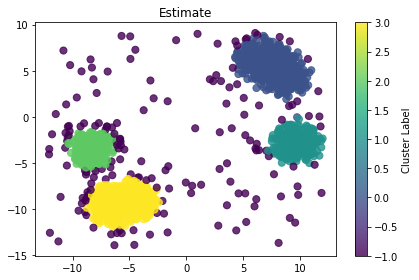

In [379]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(all_points[:, 0], all_points[:, 1], c=clusterer.labels_, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Estimate')

plt.tight_layout()
plt.show()